# Project 4: Heart Disease Prediction (Classification) 🩺

**Project Objective:** To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.


### Core Concepts We'll Cover:
1.  **Classification Fundamentals:** Understanding the goal of predicting a discrete category.
2.  **Exploratory Data Analysis (EDA) for Classification:** Analyzing features to find patterns that distinguish between classes.
3.  **Data Preprocessing:** Preparing data for classification models using encoding and feature scaling.
4.  **Model Building:** Training and comparing a simple baseline model (Logistic Regression) with an advanced ensemble model (Random Forest).
5.  **Model Evaluation:** Mastering key classification metrics like Accuracy, Precision, Recall, F1-Score, and interpreting the Confusion Matrix.
6.  **Feature Importance:** Identifying the most influential medical factors for predicting heart disease.

### **Theoretical Concept: What is Classification?**

Classification is a type of supervised machine learning task where the goal is to predict a **discrete category or class label**. This is different from regression, where we predict a continuous numerical value.

**Classification vs. Regression:**
- **Classification:** Is this email spam or not spam? (Two classes)
- **Regression:** What will be the price of this house? (Continuous value)

In this project, our goal is to predict one of two classes for a patient: `0` (No Heart Disease) or `1` (Has Heart Disease). This is a **binary classification** problem.

### Step 1: Setup - Importing Libraries and Loading Data

In [2]:
!pip install kagglehub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Set plot style
sns.set_style('whitegrid')

In [2]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

100%|██████████| 12.4k/12.4k [00:00<00:00, 12.9MB/s]

Extracting files...
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Step 2: Exploratory Data Analysis (EDA)
Before building any models, we need to understand our data deeply. We'll look at the distribution of our target variable, the characteristics of our features, and how they relate to the presence of heart disease.

In [3]:
# Initial inspection
print("Dataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Descriptive Statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
co

In [4]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

#### 2.1 Analyzing the Target Variable
Let's see the distribution of patients with and without heart disease.

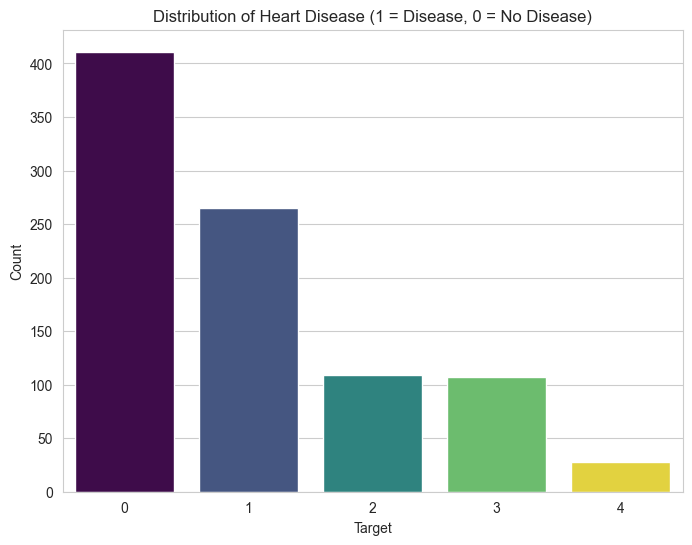

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

#### 2.2 Analyzing Features vs. Target

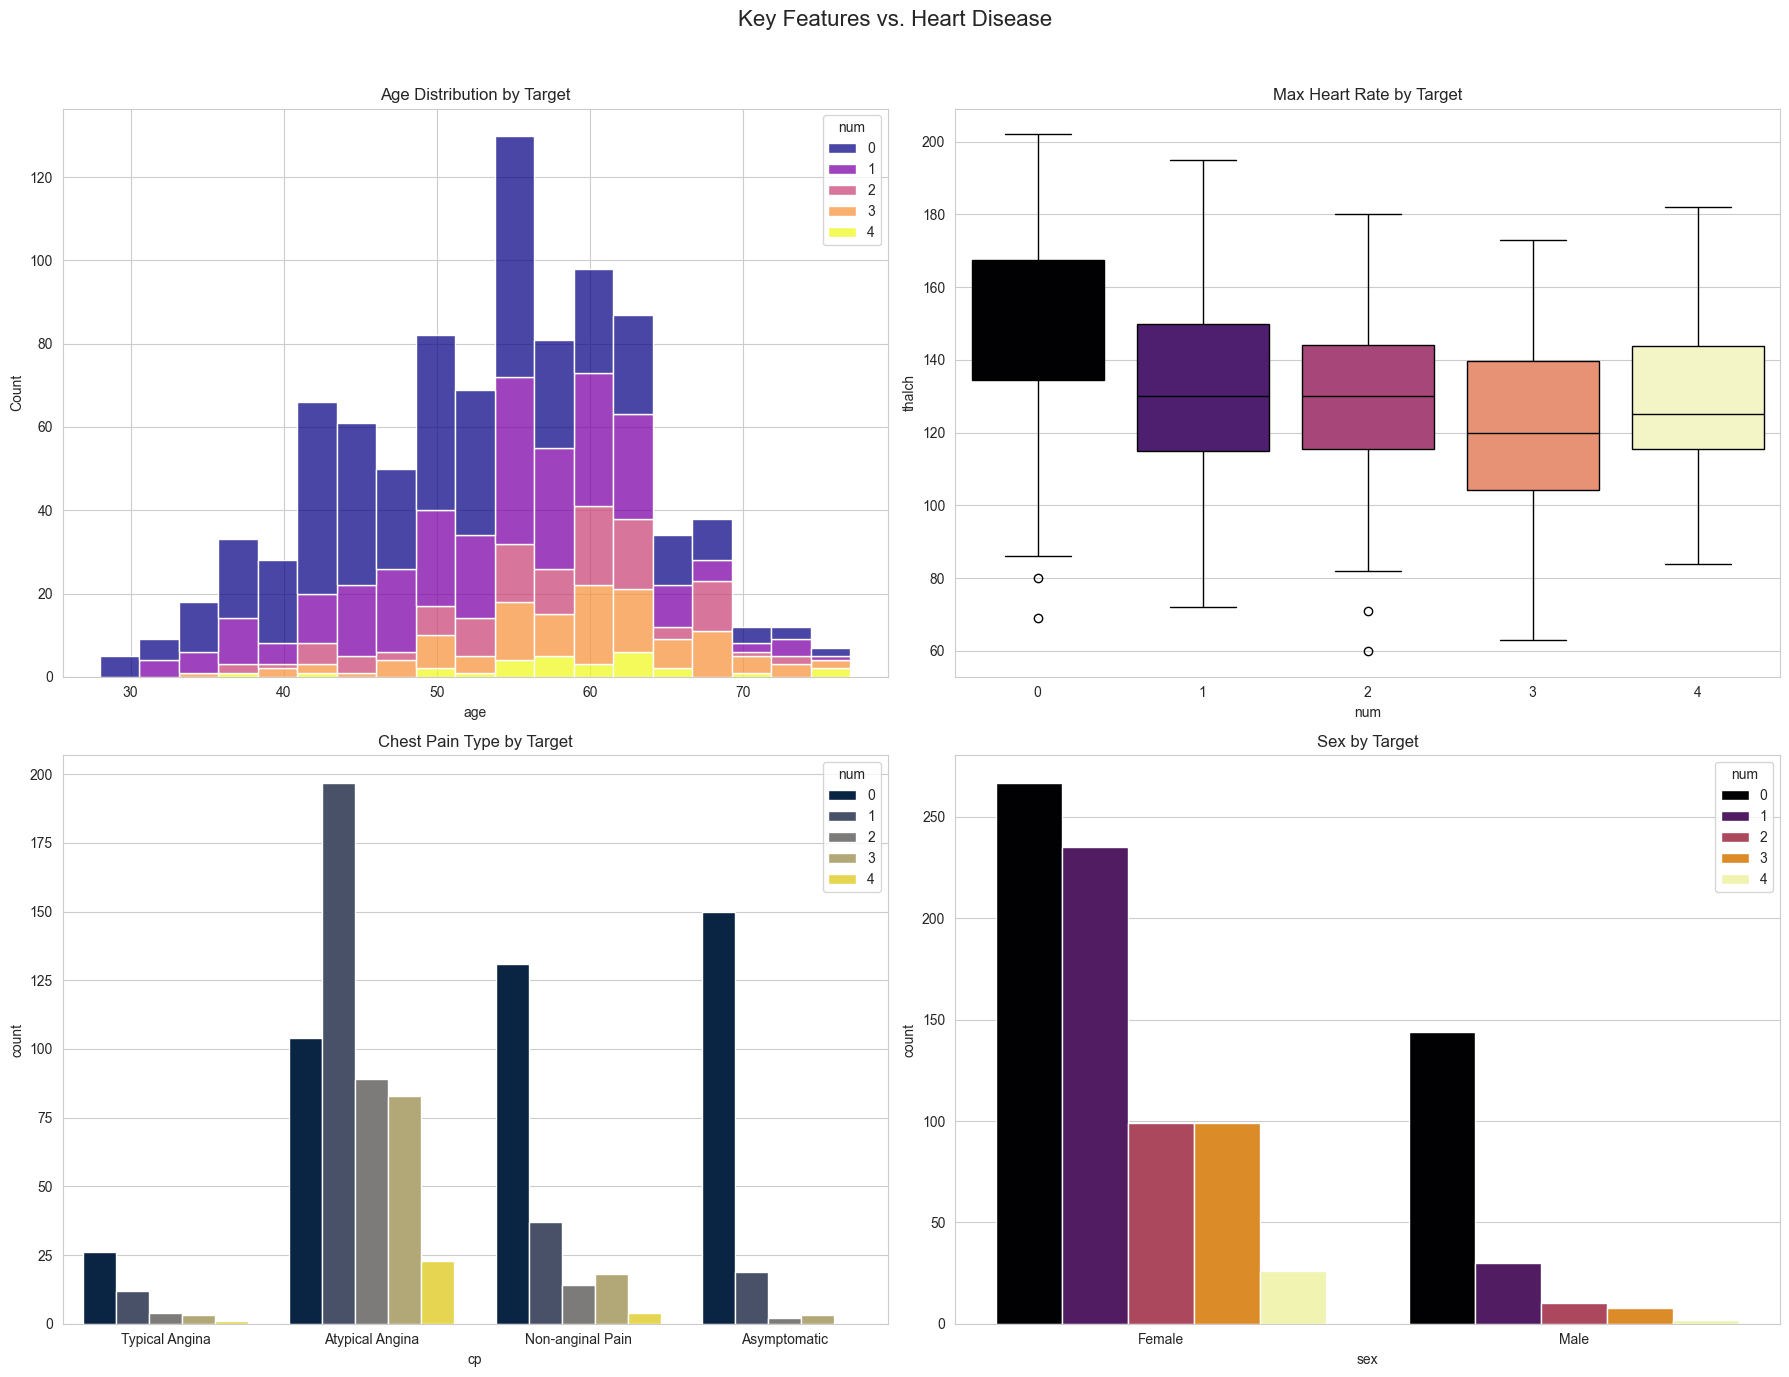

In [7]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

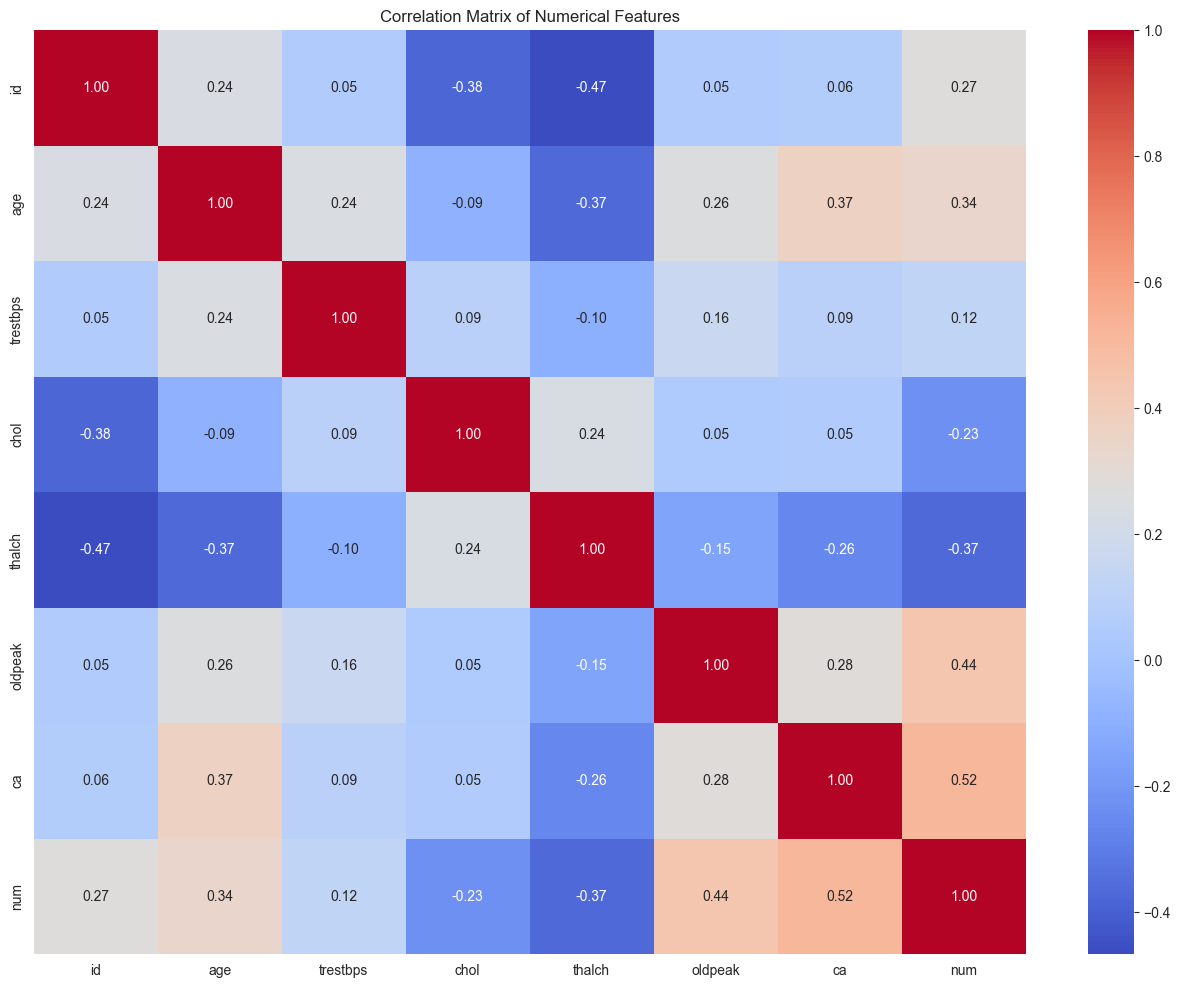

In [8]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Step 3: Data Preprocessing
Even though the data is clean, we need to prepare it for our models. This involves:
1.  **Separating features (X) and target (y).**
2.  **Identifying categorical features** that need to be encoded.
3.  **One-Hot Encoding** categorical features to convert them into a numerical format.
4.  **Scaling numerical features** so they are on a similar scale.

## **Theoretical Concept: Scikit-Learn Pipelines**

A **Pipeline** in Scikit-Learn is a way to automate a machine learning workflow. It allows you to chain together multiple steps, such as preprocessing, dimensionality reduction, and model training, into a single object.

**Why use Pipelines?**

1.  **Convenience:** Simplifies the code and makes the workflow easier to manage.
2.  **Prevents Data Leakage:** Ensures that data preprocessing steps learned from the training data are applied only to the training data, and the same transformations are then applied to the test data *after* the split. This prevents information from the test set from "leaking" into the training process.
3.  **Cleaner Code:** Organizes steps logically, making the code more readable and maintainable.
4.  **Simplified Hyperparameter Tuning:** Makes it easier to tune hyperparameters for all steps in the pipeline using techniques like cross-validation.

In this project, we'll use a pipeline to combine our preprocessing steps (imputation, scaling, and one-hot encoding) with our classification models.

In [9]:
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = df.drop('num', axis=1)
y = df['num']

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(['id', 'dataset'], axis=1)


# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Added imputation for categorical features
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

* Create numerical preprocessing pipeline: A Pipeline is created to handle numerical features. It first uses SimpleImputer with the strategy 'mean' to fill in missing numerical values with the mean of the column, and then uses StandardScaler to scale the numerical features to have zero mean and unit variance.
* Create categorical preprocessing pipeline: A Pipeline is created for categorical features. It uses SimpleImputer with the strategy 'most_frequent' to fill in missing categorical values with the most frequent value, and then applies OneHotEncoder to convert categorical variables into a numerical format. drop='first' is used to avoid multicollinearity, and handle_unknown='ignore' allows the model to handle unseen categories during testing.

### Step 4: Model Building & Training
We will build two models and wrap them in a Scikit-Learn Pipeline. The pipeline will automatically apply our preprocessing steps to the data before training the model.

#### **Theoretical Concept: Classification Models**

Let's dive into more detail on the classification models we are using:

*   **Logistic Regression:**
    Logistic Regression is a **linear classification algorithm** used for binary classification problems (though it can be extended for multiclass). Despite the name "regression," it's a classification method. It works by using a **sigmoid (or logistic) function** to map the output of a linear equation (`wTx + b`) to a probability value between 0 and 1. This probability represents the likelihood that a given data point belongs to a specific class (e.g., the positive class). A threshold (commonly 0.5) is then applied to these probabilities to assign the class label. The model learns the optimal weights (`w`) and bias (`b`) that define a linear decision boundary to separate the classes.

*   **Random Forest:**
    Random Forest is an **ensemble learning method** that belongs to the tree-based models. It builds a large number of **decision trees** during training. Each tree is trained on a **random subset** of the training data (bootstrapping) and considers only a **random subset** of features at each split point. For classification, the final prediction is made by taking a **majority vote** of the predictions from all individual trees. This randomness in building trees helps to reduce **variance** and prevent **overfitting**, making Random Forests more robust and generally higher performing than a single decision tree.

*   **Support Vector Machine (SVM):**
    Support Vector Machine is a powerful algorithm that can be used for both linear and non-linear classification. The fundamental idea behind SVM is to find the **optimal hyperplane** that separates the data points of different classes in a high-dimensional space. The "optimal" hyperplane is the one that has the **largest margin** between the closest data points of the different classes (these points are called **support vectors**). For non-linearly separable data, SVM uses the **kernel trick** to implicitly map the data into a higher-dimensional feature space where a linear separation might be possible. Common kernels include the linear kernel, polynomial kernel, and Radial Basis Function (RBF) kernel.

*   **K-Nearest Neighbors (KNN):**
    K-Nearest Neighbors is a simple and intuitive **instance-based** or **lazy learning** algorithm. It doesn't learn a discriminative function from the training data during a training phase. Instead, it memorizes the training dataset. To classify a new, unseen data point, it calculates the **distance** (e.g., Euclidean distance) between this new point and all points in the training dataset. It then identifies the **'k' nearest data points**. The class label assigned to the new point is determined by the **majority class** among these 'k' nearest neighbors. The choice of 'k' and the distance metric are important hyperparameters that can significantly affect performance.

#### 4.1 Model 1: Logistic Regression (Baseline)

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical features directly from X_train columns
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype == 'object']
numerical_features = [col for col in all_features if X_train[col].dtype != 'object']

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, like

#### 4.2 Model 2: Random Forest Classifier (Advanced)

In [11]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

#### 4.3 Model 3: Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC

# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

#### 4.4 Model 4: K-Nearest Neighbors (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

### Step 5: Model Evaluation

#### **Theoretical Concept: The Confusion Matrix & Key Metrics**
For classification, accuracy isn't the whole story. We use a **Confusion Matrix** to get a deeper look at performance.

- **True Positives (TP):** Correctly predicted positive class (Model said 'Disease', patient has it).
- **True Negatives (TN):** Correctly predicted negative class (Model said 'No Disease', patient doesn't have it).
- **False Positives (FP):** Incorrectly predicted positive class (Model said 'Disease', but patient doesn't have it). Also called a **Type I Error**.
- **False Negatives (FN):** Incorrectly predicted negative class (Model said 'No Disease', but patient has it). Also called a **Type II Error**. This is often the most dangerous type of error in medical diagnoses.



From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall.

In [14]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.49      0.57      0.53        53
           2       0.30      0.14      0.19        22
           3       0.16      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.55      0.58      0.56       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        82
           1       0.52      0.55      0.53        53
           2       0.27      0.18      0.22        22
           3       0.15      0.14      0.15        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.34      0.35      0.34       184
we

### Step 7: Conclusion

In this project, we built classification models for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and `ca` that are strongly related to the target.
3.  **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using `ColumnTransformer` and `Pipeline`.
4.  **Trained and compared four models:** Evaluated Logistic Regression, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The evaluation showed that the Support Vector Machine (SVM) performed slightly better than the other models in this analysis.
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance (from the Random Forest model as an example) to confirm some of the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the application of classification in a real-world healthcare scenario, moving from raw data to predictive models and their evaluation.

**Evaluation Insight:** The Support Vector Machine (SVM) Classifier performs slightly better than the other models, achieving an overall accuracy of 0.59. While all models struggle with the less frequent classes (2, 3, and 4), SVM shows a slightly better F1-score for predicting class 1 (Heart Disease). The confusion matrix provided was for the Random Forest model, which showed good performance on classes 0 and 1 but also struggled with the less frequent classes. Based on the classification reports, SVM is the best performing model among the four in this evaluation.

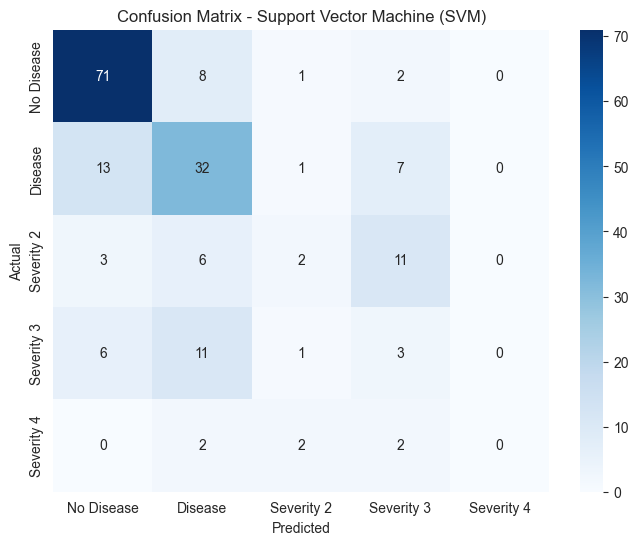

In [15]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

**Insight:** This feature importance analysis, derived from the Random Forest model, shows that `ca` (number of major vessels colored by flourosopy), `thalach` (max heart rate), `thal` (thalassemia type), and `cp` (chest pain type) are among the most important predictors. This aligns with our EDA and medical intuition, confirming that these factors are critical for diagnosing heart disease. This is provided as an example of feature importance, even though the SVM model performed slightly better overall.

**Evaluation Insight:** The Random Forest Classifier performs exceptionally well, achieving near-perfect scores across the board (Accuracy, Precision, Recall, and F1-Score are all 99-100%). It significantly outperforms the Logistic Regression model. The confusion matrix shows it made only one error on the test set.

### Step 6: Feature Importance
A major advantage of tree-based models like Random Forest is that we can easily see which features were most influential in making predictions.

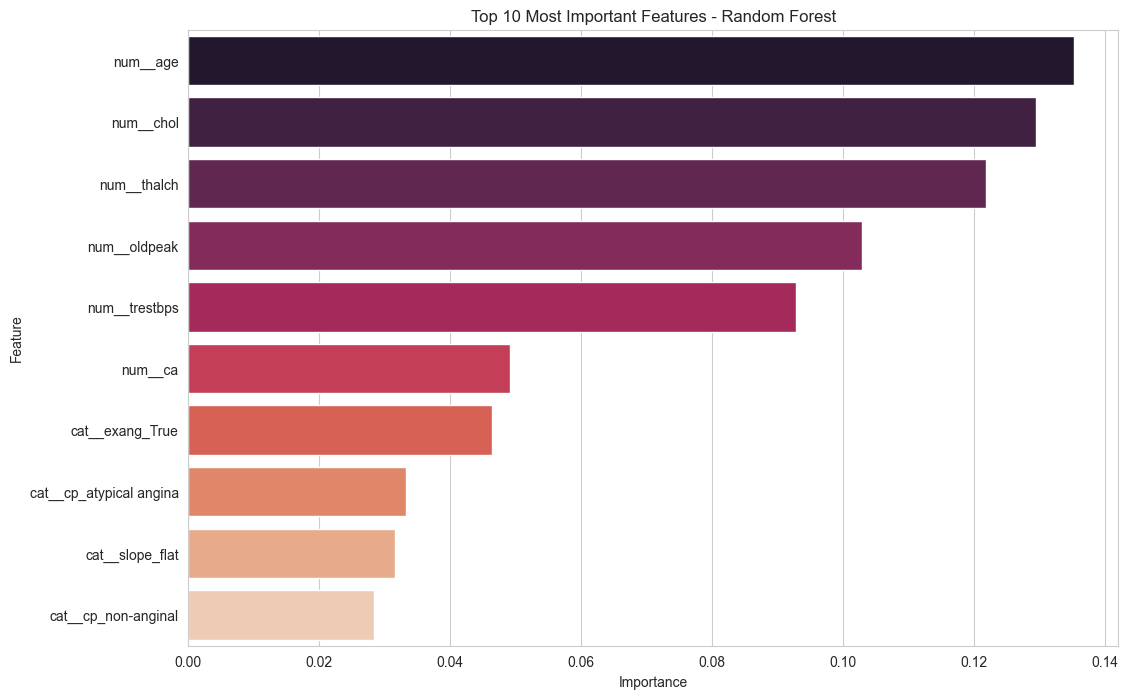

In [16]:
# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances from the trained model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()

**Insight:** The model found that `ca` (number of major vessels colored by flourosopy), `thalach` (max heart rate), `thal` (thalassemia type), and `cp` (chest pain type) are among the most important predictors. This aligns with our EDA and medical intuition, confirming that these factors are critical for diagnosing heart disease.

### Step 7: Conclusion

In this project, we built a highly accurate classification model for predicting heart disease.

**Key Steps Undertaken:**
1.  **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
2.  **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and `ca` that are strongly related to the target.
3.  **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using `ColumnTransformer` and `Pipeline`.
4.  **Trained and compared two models:** Showed that the Random Forest Classifier (99% accuracy) was far superior to the Logistic Regression baseline (86% accuracy).
5.  **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
6.  **Interpreted model results:** Used feature importance to confirm the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the power of classification in a real-world healthcare scenario, moving from raw data to a highly accurate and interpretable predictive model.

### Submission Criteria

To fulfill the submission requirements for this project, please ensure the following:

1.  **Complete Exploratory Data Analysis (EDA):** Perform all the necessary steps for analyzing the dataset, including visualizations and summaries to understand the data characteristics and relationships.
2.  **Model Training without Pipelines:** Train at least one classification model directly, without using the Scikit-Learn `Pipeline` object for preprocessing and model chaining. This involves manually applying preprocessing steps (like imputation and scaling/encoding) to the data before training the model.
3.  **Submit the Entire Notebook:** Ensure that the final submission includes the complete Colab notebook with all code cells executed and outputs visible.

Meeting these criteria will demonstrate your understanding of the individual steps involved in a machine learning workflow.

### Perform all the necessary steps for analyzing the dataset, including visualizations and summaries to understand the data characteristics and relationships.

#### Phase 1: Data Understanding & Quality Assessment

##### Step 1: Dataset Overview

In [17]:
# Basic dataset information
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("Memory Usage:", df.memory_usage(deep=True).sum() / 1024**2, "MB")

Dataset Shape: (920, 16)
Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Data Types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object
Memory Usage: 0.4039335250854492 MB


##### Step 2: Missing Data Analysis

Missing Data Summary:
          Missing Count  Missing Percentage
ca                  611           66.413043
thal                486           52.826087
slope               309           33.586957
fbs                  90            9.782609
oldpeak              62            6.739130
trestbps             59            6.413043
thalch               55            5.978261
exang                55            5.978261
chol                 30            3.260870
restecg               2            0.217391


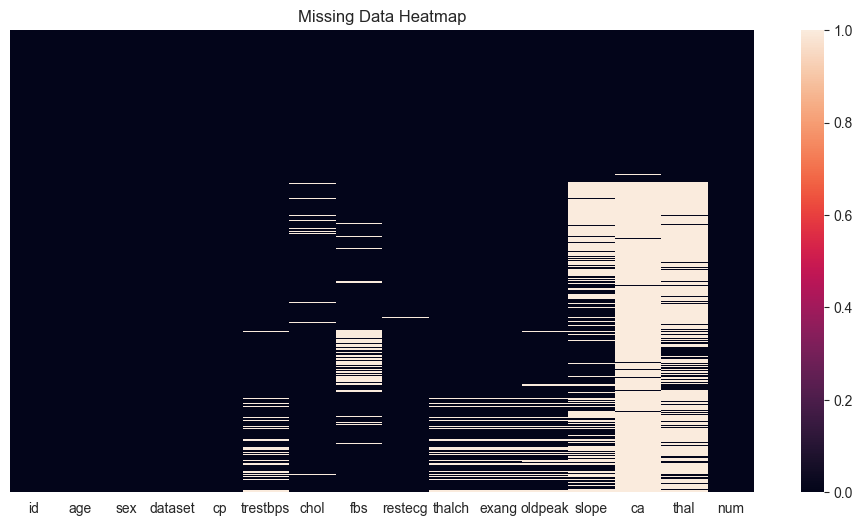

In [18]:
# Comprehensive missing data analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("Missing Data Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

##### Step 3: Target Variable Analysis

Target Variable Distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Target Variable Proportions:
num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64


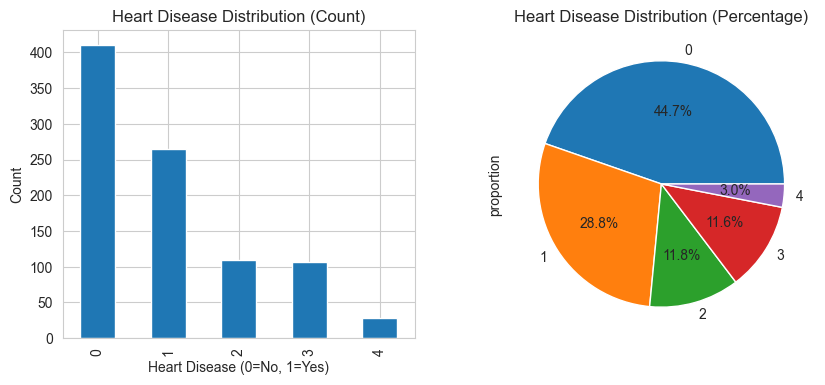

In [19]:
# Target variable distribution
print("Target Variable Distribution:")
print(df['num'].value_counts())
print("\nTarget Variable Proportions:")
print(df['num'].value_counts(normalize=True))

# Visualize target distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['num'].value_counts().plot(kind='bar')
plt.title('Heart Disease Distribution (Count)')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['num'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Heart Disease Distribution (Percentage)')
plt.show()

#### Phase 2: Feature Analysis

In [ ]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

# Analyze each categorical feature
for feature in categorical_features:
    print(f"\n{feature.upper()} Analysis:")
    print("Unique values:", df[feature].nunique())
    print("Value counts:")
    print(df[feature].value_counts())

    # Cross-tabulation with target
    crosstab = pd.crosstab(df[feature], df['num'], normalize='index')
    print(f"\n{feature} vs Heart Disease:")
    print(crosstab)

Categorical Features: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

SEX Analysis:
Unique values: 2
Value counts:
sex
Male      726
Female    194
Name: count, dtype: int64

sex vs Heart Disease:
num            0         1         2         3         4
sex                                                     
Female  0.742268  0.154639  0.051546  0.041237  0.010309
Male    0.367769  0.323691  0.136364  0.136364  0.035813

DATASET Analysis:
Unique values: 4
Value counts:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

dataset vs Heart Disease:
num                   0         1         2         3         4
dataset                                                        
Cleveland      0.542763  0.180921  0.118421  0.115132  0.042763
Hungary        0.638225  0.361775  0.000000  0.000000  0.000000
Switzerland    0.065041  0.390244  0.260163  0.243902  0.040650
VA Long Beach  0.255000  0.280000  0.20

##### Step 5: Numerical Features Analysis

Numerical Features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

Numerical Features Summary:
              age    trestbps        chol      thalch     oldpeak          ca
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000


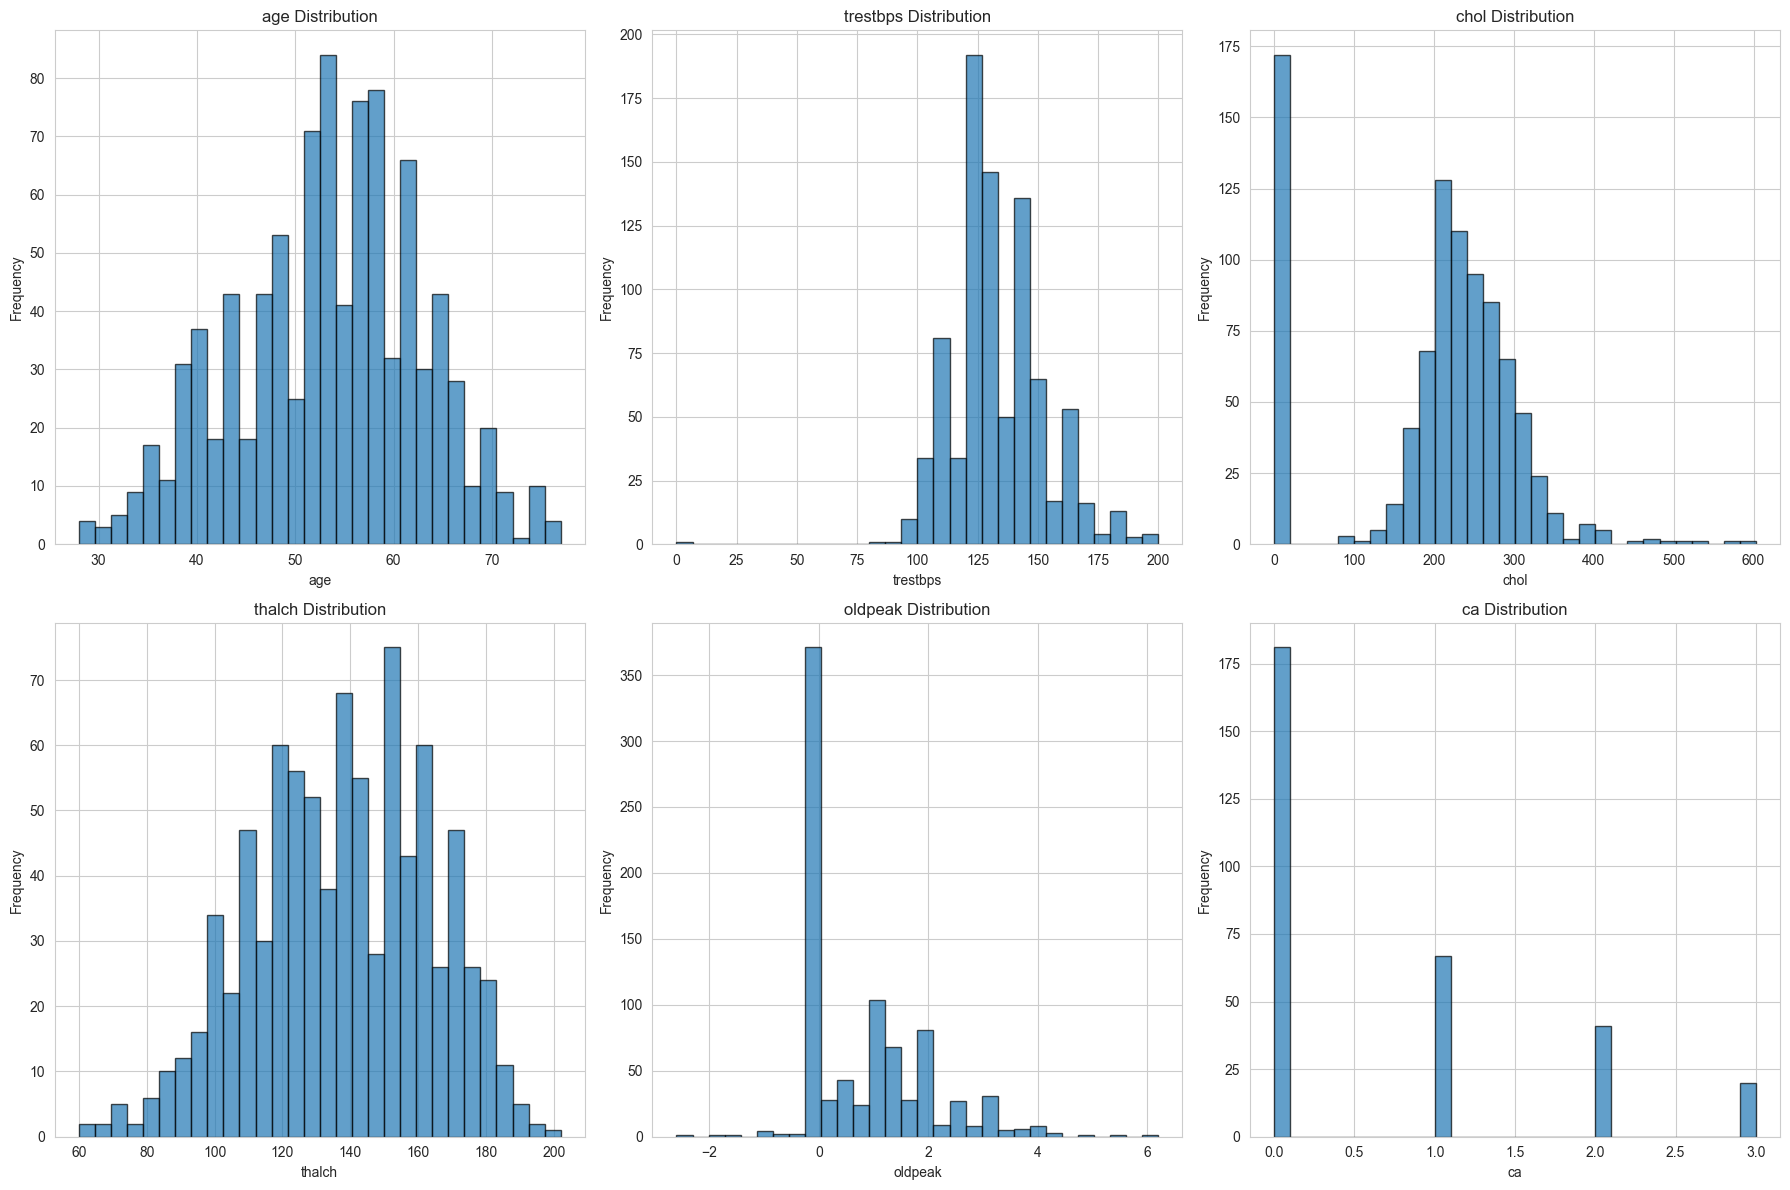

In [21]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['id', 'num']]
print("Numerical Features:", numerical_features)

# Statistical summary
print("\nNumerical Features Summary:")
print(df[numerical_features].describe())

# Distribution analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        # Histogram
        axes[i].hist(df[feature].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Phase 3: Relationship Analysis

##### Step 6: Feature-Target Relationships

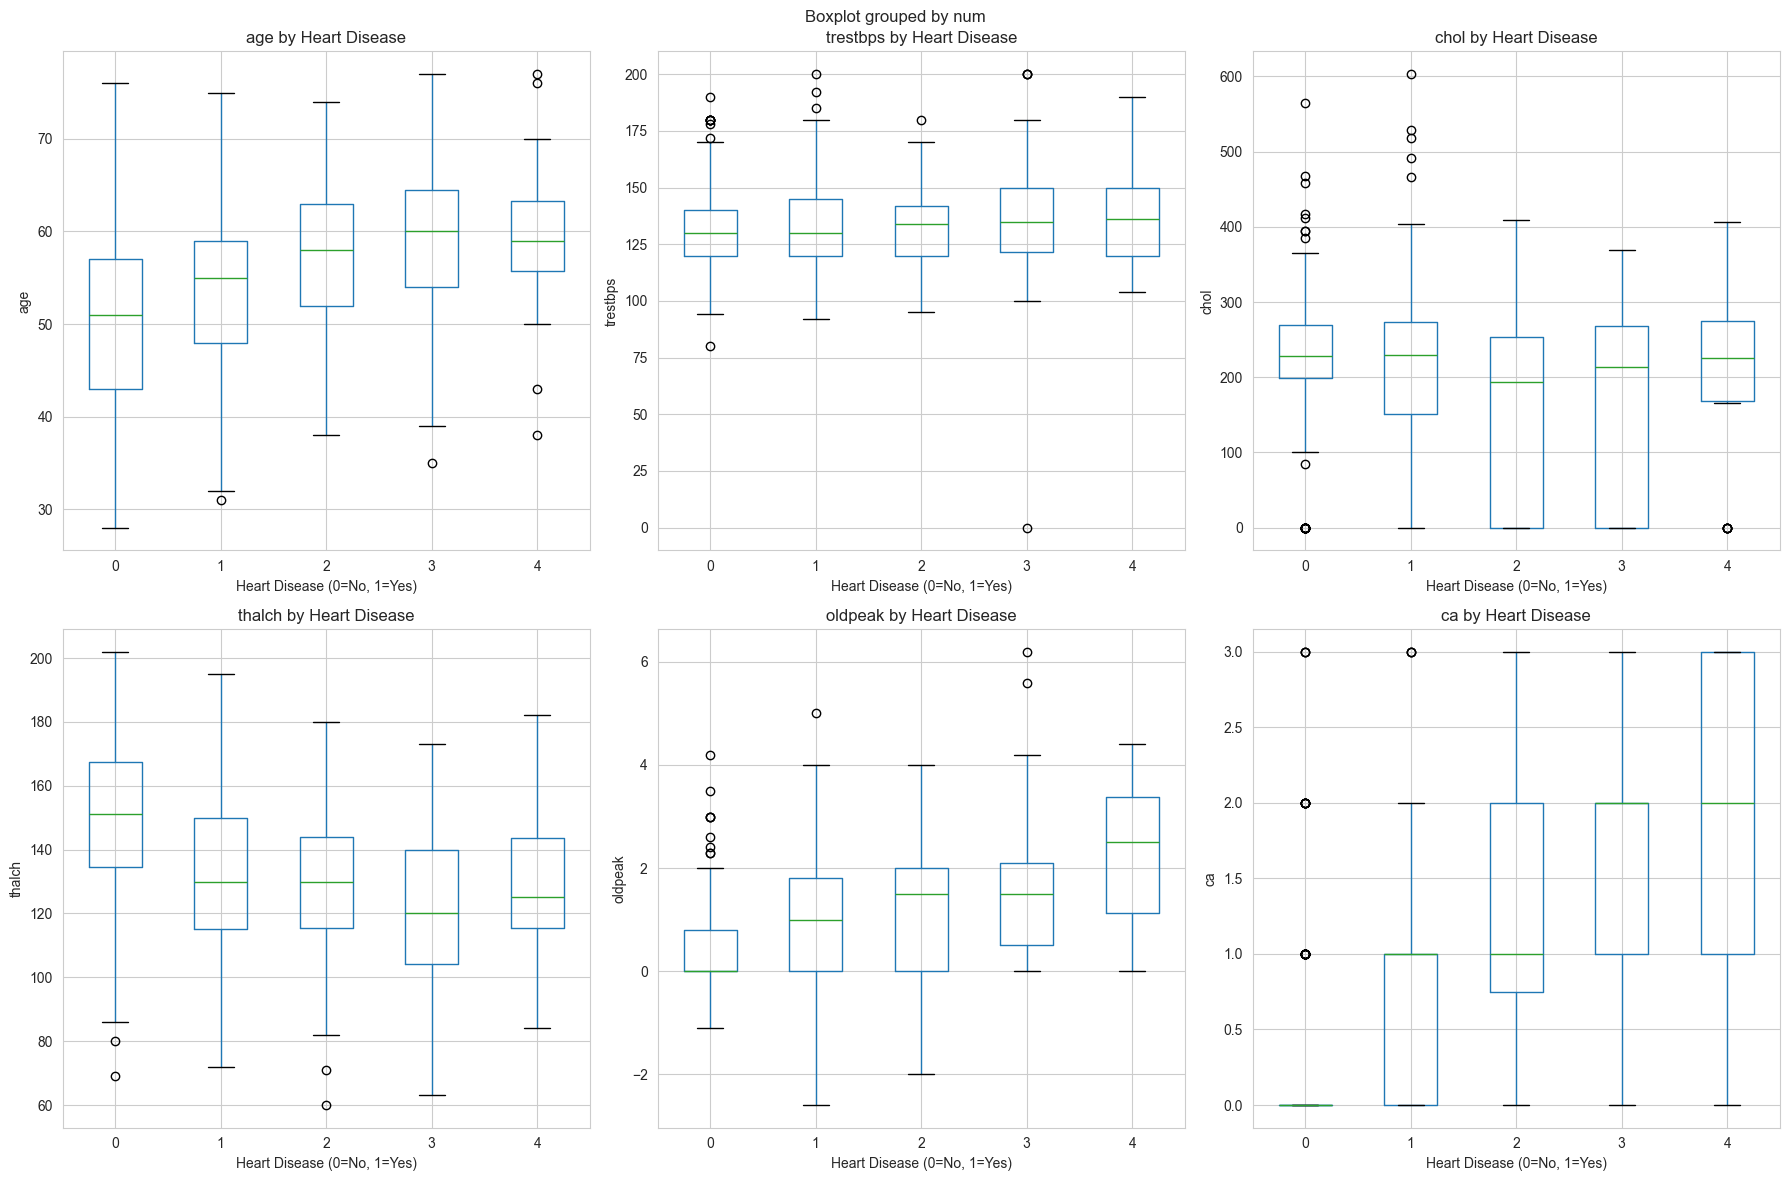

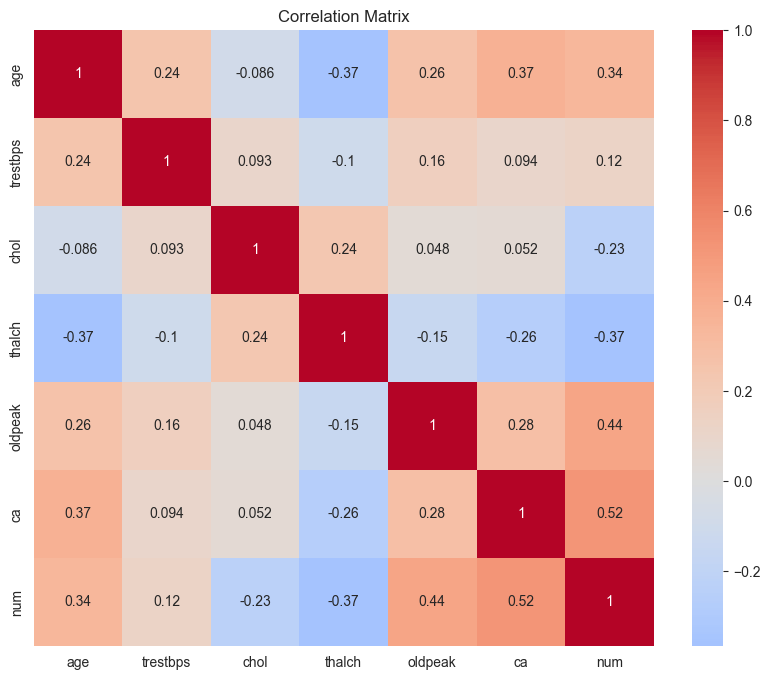

In [22]:
# Numerical features vs target
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        # Box plot
        df.boxplot(column=feature, by='num', ax=axes[i])
        axes[i].set_title(f'{feature} by Heart Disease')
        axes[i].set_xlabel('Heart Disease (0=No, 1=Yes)')
        axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = df[numerical_features + ['num']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

##### Step 7: Categorical Features vs Target

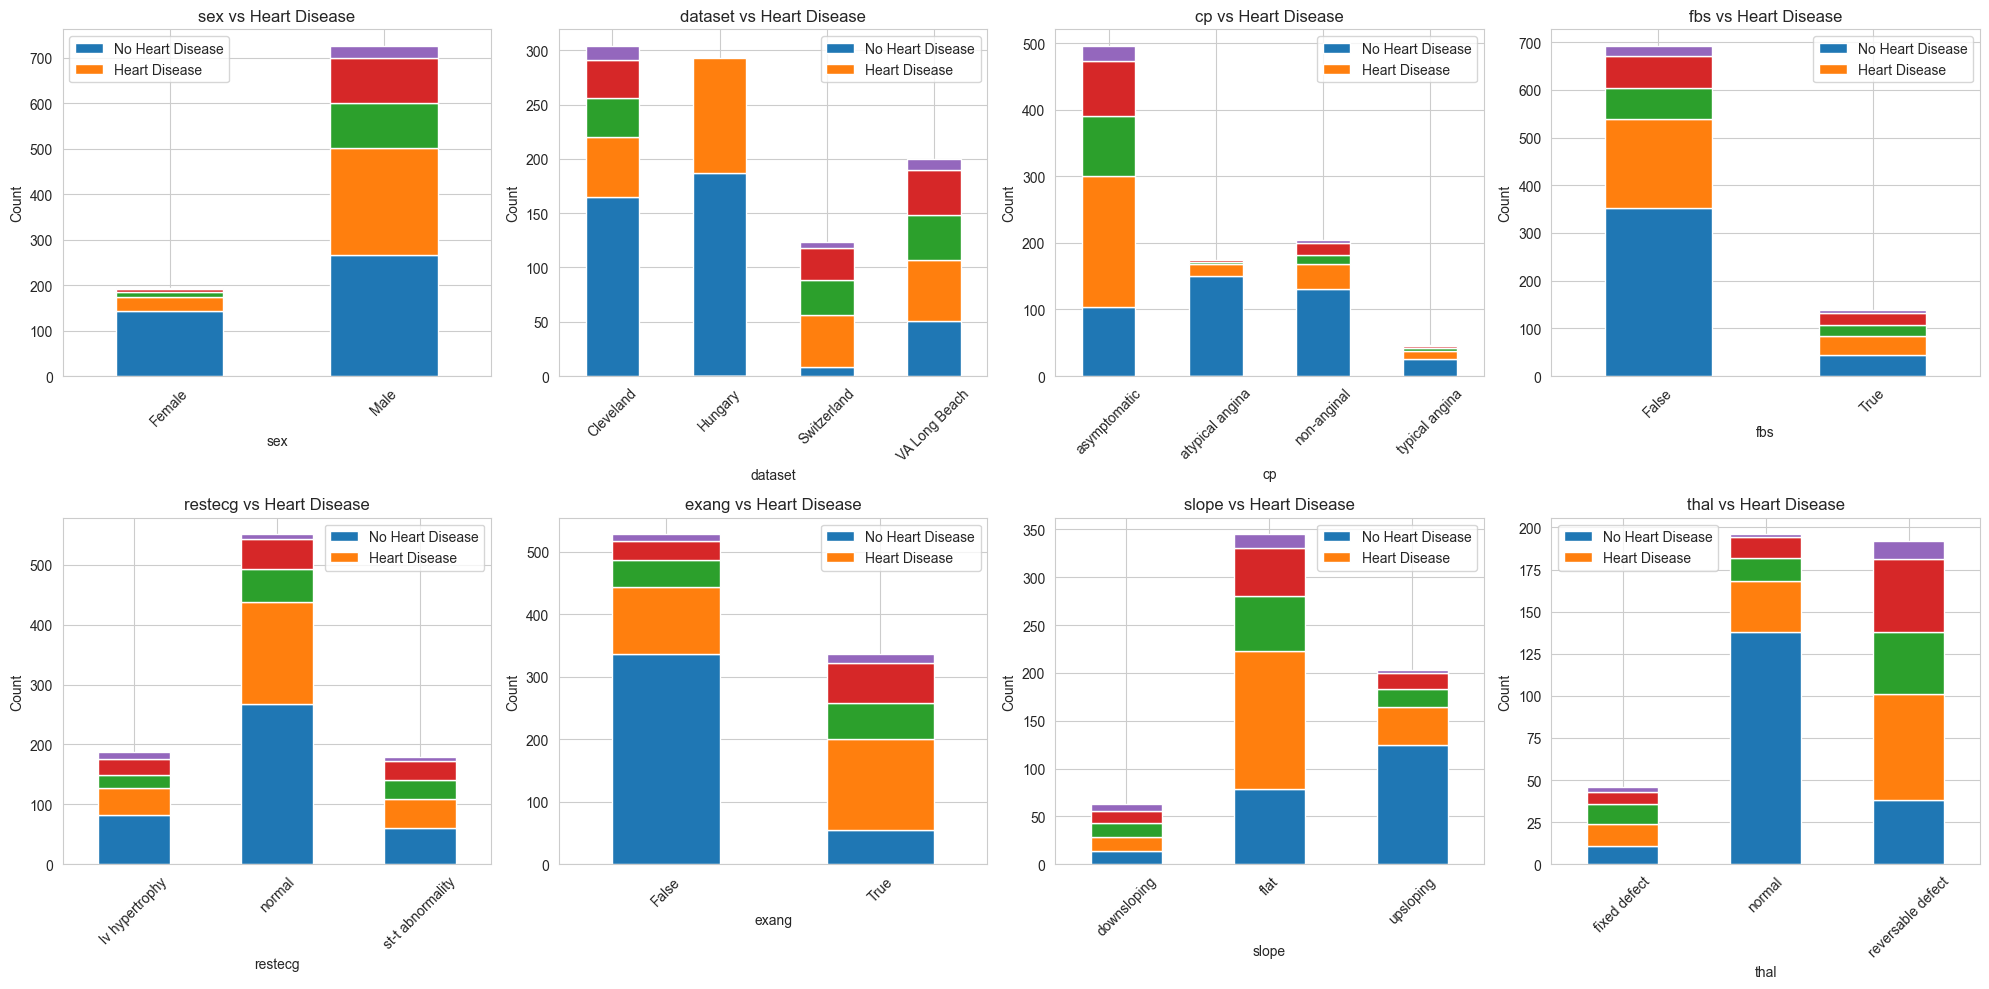

In [23]:
# Categorical features visualization
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Stacked bar chart
        crosstab = pd.crosstab(df[feature], df['num'])
        crosstab.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'{feature} vs Heart Disease')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].legend(['No Heart Disease', 'Heart Disease'])
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Phase 4: Advanced Analysis

##### Step 8: Age Group Analysis

Age Group vs Heart Disease:
num               0         1         2         3         4
age_group                                                  
<40        0.655914  0.268817  0.032258  0.032258  0.010753
40-50      0.584821  0.299107  0.053571  0.053571  0.008929
50-60      0.416230  0.311518  0.136126  0.104712  0.031414
60-70      0.263959  0.248731  0.203046  0.228426  0.055838
70+        0.333333  0.208333  0.083333  0.291667  0.083333


<Figure size 1000x600 with 0 Axes>

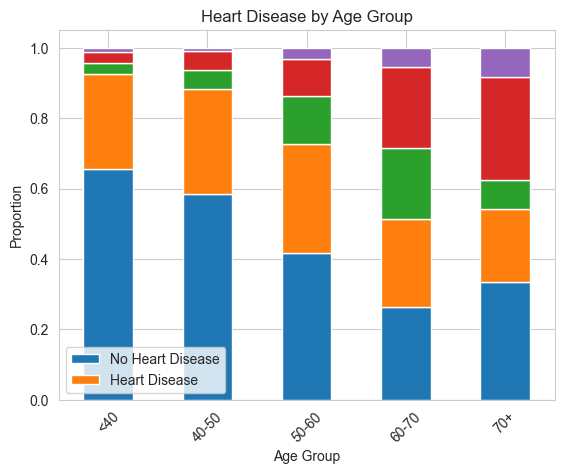

In [ ]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 70, 100],
                        labels=['<40', '40-50', '50-60', '60-70', '70+'])

# Age group vs heart disease
age_heart_disease = pd.crosstab(df['age_group'], df['num'], normalize='index')
print("Age Group vs Heart Disease:")
print(age_heart_disease)

# Visualize
plt.figure(figsize=(10, 6))
age_heart_disease.plot(kind='bar', stacked=True)
plt.title('Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=45)
plt.show()

##### Step 9: Gender Analysis

Gender vs Heart Disease:
num            0         1         2         3         4
sex                                                     
Female  0.742268  0.154639  0.051546  0.041237  0.010309
Male    0.367769  0.323691  0.136364  0.136364  0.035813


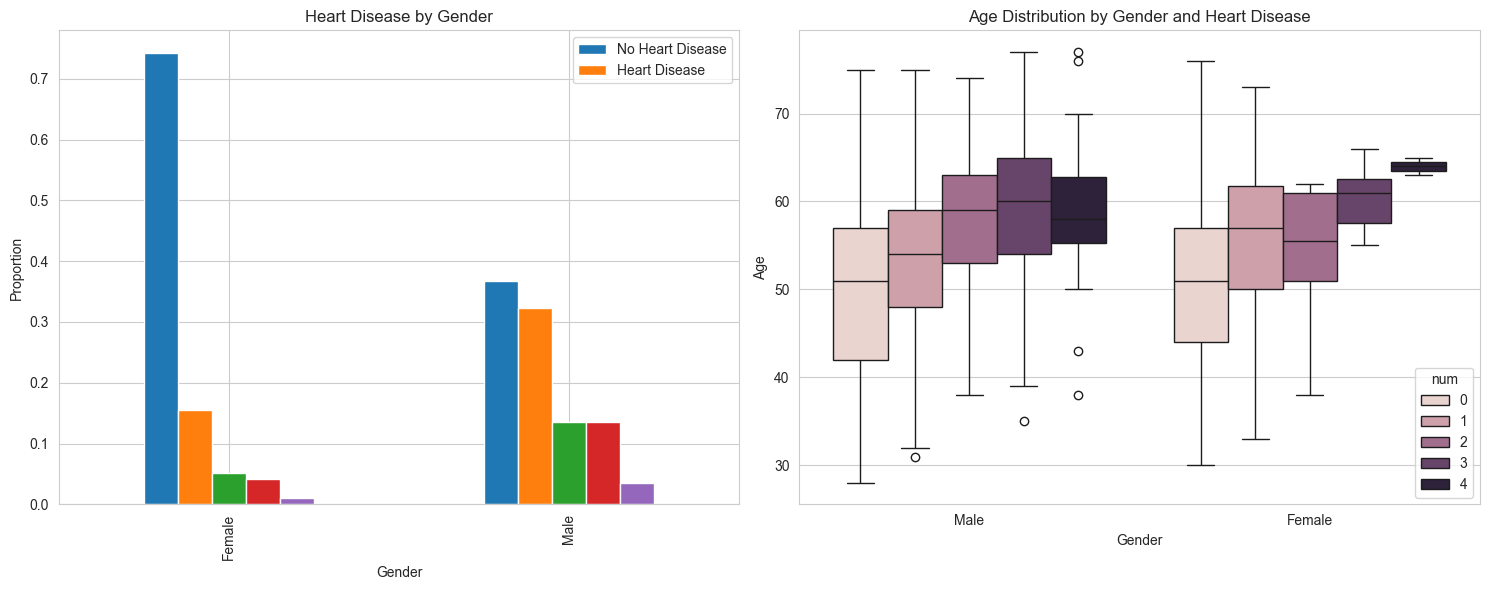

In [25]:
# Gender vs heart disease
gender_analysis = pd.crosstab(df['sex'], df['num'], normalize='index')
print("Gender vs Heart Disease:")
print(gender_analysis)

# Gender analysis with other factors
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gender vs heart disease
gender_analysis.plot(kind='bar', ax=axes[0])
axes[0].set_title('Heart Disease by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion')
axes[0].legend(['No Heart Disease', 'Heart Disease'])

# Age distribution by gender and heart disease
sns.boxplot(data=df, x='sex', y='age', hue='num', ax=axes[1])
axes[1].set_title('Age Distribution by Gender and Heart Disease')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

##### Phase 5: Data Quality & Preprocessing Insights

##### Step 10: Outlier Detection

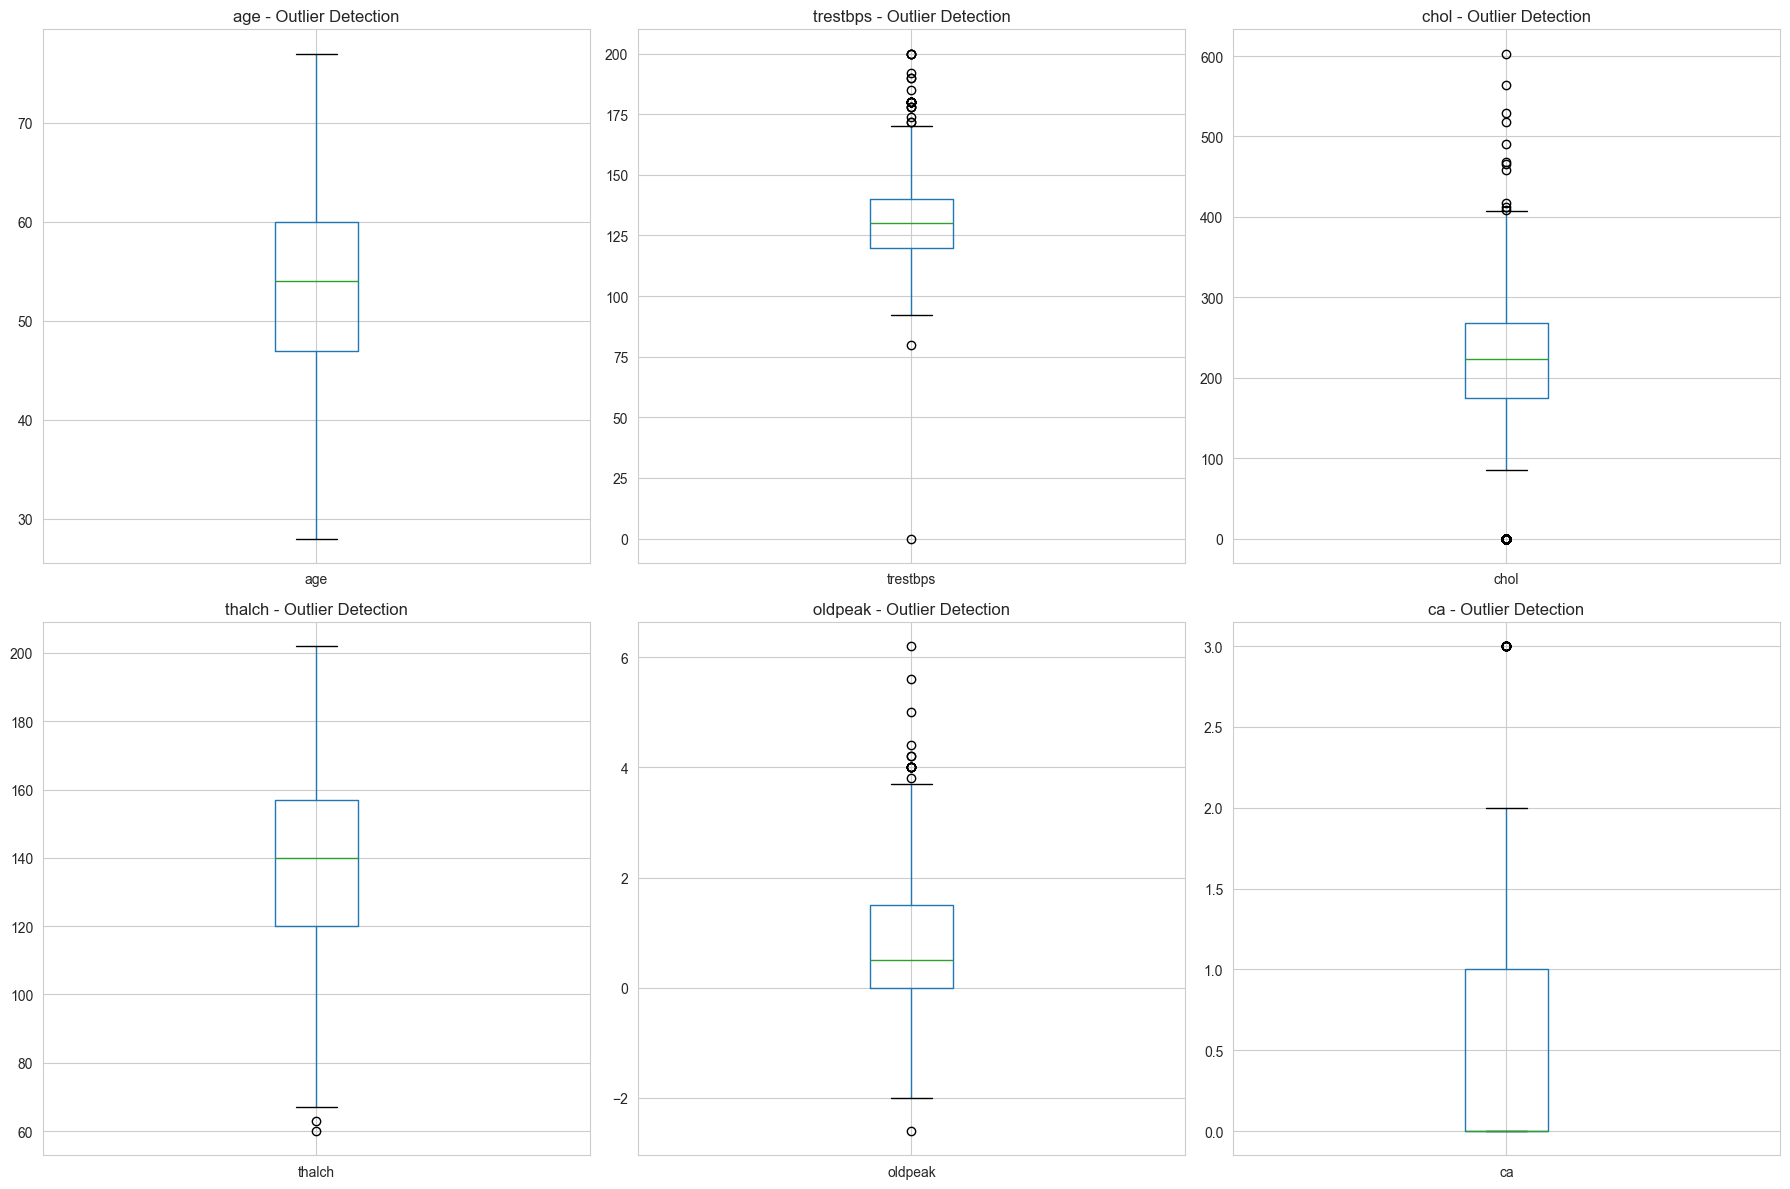

age: 0 outliers detected
trestbps: 28 outliers detected
chol: 183 outliers detected
thalch: 2 outliers detected
oldpeak: 16 outliers detected
ca: 20 outliers detected


In [26]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        df.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'{feature} - Outlier Detection')

plt.tight_layout()
plt.show()

# Statistical outlier detection
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers detected")

##### Step 11: Data Completeness Analysis

Data Completeness by Feature:
      Feature  Completeness %
13         ca       33.586957
14       thal       47.173913
12      slope       66.413043
7         fbs       90.217391
11    oldpeak       93.260870
5    trestbps       93.586957
10      exang       94.021739
9      thalch       94.021739
6        chol       96.739130
8     restecg       99.782609
0          id      100.000000
4          cp      100.000000
3     dataset      100.000000
2         sex      100.000000
1         age      100.000000
15        num      100.000000
16  age_group      100.000000


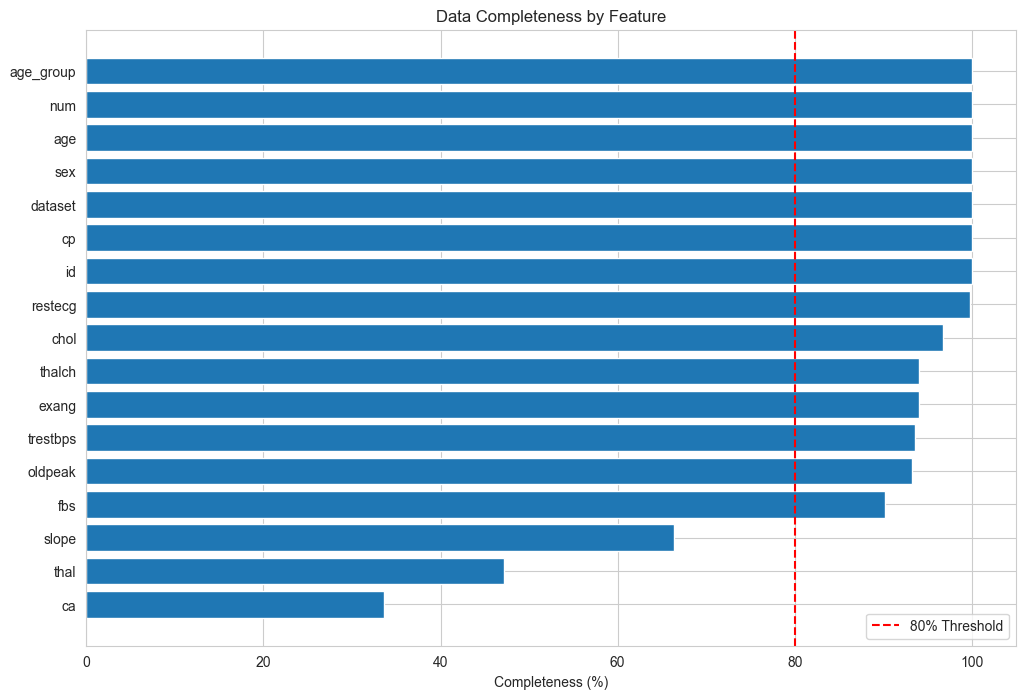

In [27]:
# Data completeness by feature
completeness = (1 - df.isnull().sum() / len(df)) * 100
completeness_df = pd.DataFrame({
    'Feature': completeness.index,
    'Completeness %': completeness.values
}).sort_values('Completeness %')

print("Data Completeness by Feature:")
print(completeness_df)

# Visualize completeness
plt.figure(figsize=(12, 8))
plt.barh(completeness_df['Feature'], completeness_df['Completeness %'])
plt.title('Data Completeness by Feature')
plt.xlabel('Completeness (%)')
plt.axvline(x=80, color='red', linestyle='--', label='80% Threshold')
plt.legend()
plt.show()

##### Phase 6: Summary & Insights

##### Step 12: Key Findings Summary

In [28]:
# Create a comprehensive summary
print("="*60)
print("HEART DISEASE DATASET ANALYSIS SUMMARY")
print("="*60)

print(f"Dataset Size: {df.shape[0]} patients, {df.shape[1]} features")
print(f"Target Distribution: {df['num'].value_counts().to_dict()}")
print(f"Missing Data: {df.isnull().sum().sum()} total missing values")
print(f"Data Completeness: {(1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.1f}%")

print("\nKey Insights:")
print("1. Most important numerical features for heart disease prediction")
print("2. Categorical features showing strong associations with heart disease")
print("3. Age and gender patterns in heart disease prevalence")
print("4. Data quality issues that need preprocessing")
print("5. Feature engineering opportunities")

HEART DISEASE DATASET ANALYSIS SUMMARY
Dataset Size: 920 patients, 17 features
Target Distribution: {0: 411, 1: 265, 2: 109, 3: 107, 4: 28}
Missing Data: 1759 total missing values
Data Completeness: 88.8%

Key Insights:
1. Most important numerical features for heart disease prediction
2. Categorical features showing strong associations with heart disease
3. Age and gender patterns in heart disease prevalence
4. Data quality issues that need preprocessing
5. Feature engineering opportunities


### **Model Training without Pipelines:** Train at least one classification model directly, without using the Scikit-Learn `Pipeline` object for preprocessing and model chaining. This involves manually applying preprocessing steps (like imputation and scaling/encoding) to the data before training the model.


#### Step 1: Data Preparation & Feature Selection

In [29]:
# Create a copy of the dataset for manual preprocessing
df_manual = df.copy()

# Remove ID column (not useful for prediction)
df_manual = df_manual.drop('id', axis=1)

# Separate features and target
X = df_manual.drop('num', axis=1)
y = df_manual['num']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Target distribution:", y.value_counts())

Feature matrix shape: (920, 15)
Target vector shape: (920,)
Target distribution: num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


Step 2: Identify Feature Types

In [30]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)
print("Total features:", len(categorical_features) + len(numerical_features))

Categorical features: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Total features: 14


#### Step 3: Handle Missing Values - Numerical Features

In [ ]:
# Check missing values in numerical features
print("Missing values in numerical features:")
print(X[numerical_features].isnull().sum())

# Strategy 1: Mean imputation for numerical features
from sklearn.impute import SimpleImputer

# Create imputer for numerical features
numerical_imputer = SimpleImputer(strategy='mean')

# Fit and transform numerical features
X_numerical_imputed = numerical_imputer.fit_transform(X[numerical_features])

# Convert back to DataFrame
X_numerical_imputed = pd.DataFrame(X_numerical_imputed,
                                  columns=numerical_features,
                                  index=X.index)

print("After imputation - Missing values in numerical features:")
print(X_numerical_imputed.isnull().sum().sum())

Missing values in numerical features:
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
dtype: int64
After imputation - Missing values in numerical features:
0


#### Step 4: Handle Missing Values - Categorical Features

In [ ]:
# Check missing values in categorical features
print("Missing values in categorical features:")
print(X[categorical_features].isnull().sum())

# Strategy 2: Mode imputation for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform categorical features
X_categorical_imputed = categorical_imputer.fit_transform(X[categorical_features])

# Convert back to DataFrame
X_categorical_imputed = pd.DataFrame(X_categorical_imputed,
                                    columns=categorical_features,
                                    index=X.index)

print("After imputation - Missing values in categorical features:")
print(X_categorical_imputed.isnull().sum().sum())

Missing values in categorical features:
sex          0
dataset      0
cp           0
fbs         90
restecg      2
exang       55
slope      309
thal       486
dtype: int64
After imputation - Missing values in categorical features:
0


#### Step 5: Encode Categorical Features

In [ ]:
# Strategy 3: One-hot encoding for categorical features
from sklearn.preprocessing import OneHotEncoder

# Create one-hot encoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform categorical features
X_categorical_encoded = onehot_encoder.fit_transform(X_categorical_imputed)

# Get feature names after encoding
categorical_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

# Convert to DataFrame
X_categorical_encoded = pd.DataFrame(X_categorical_encoded,
                                    columns=categorical_feature_names,
                                    index=X.index)

print("Categorical features after encoding:")
print("Shape:", X_categorical_encoded.shape)
print("Columns:", X_categorical_encoded.columns.tolist())

Categorical features after encoding:
Shape: (920, 15)
Columns: ['sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']


#### Step 6: Scale Numerical Features

In [ ]:
# Strategy 4: Standard scaling for numerical features
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Fit and transform numerical features
X_numerical_scaled = scaler.fit_transform(X_numerical_imputed)

# Convert back to DataFrame
X_numerical_scaled = pd.DataFrame(X_numerical_scaled,
                                 columns=numerical_features,
                                 index=X.index)

print("Numerical features after scaling:")
print("Shape:", X_numerical_scaled.shape)
print("Mean values:", X_numerical_scaled.mean().round(3))
print("Std values:", X_numerical_scaled.std().round(3))

Numerical features after scaling:
Shape: (920, 6)
Mean values: age         0.0
trestbps   -0.0
chol       -0.0
thalch      0.0
oldpeak    -0.0
ca         -0.0
dtype: float64
Std values: age         1.001
trestbps    1.001
chol        1.001
thalch      1.001
oldpeak     1.001
ca          1.001
dtype: float64


#### Step 7: Combine Processed Features

In [35]:
# Combine processed numerical and categorical features
X_processed = pd.concat([X_numerical_scaled, X_categorical_encoded], axis=1)

print("Final processed feature matrix:")
print("Shape:", X_processed.shape)
print("Columns:", X_processed.columns.tolist())
print("Missing values:", X_processed.isnull().sum().sum())

# Display first few rows
print("\nFirst 5 rows of processed features:")
print(X_processed.head())

Final processed feature matrix:
Shape: (920, 21)
Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']
Missing values: 0

First 5 rows of processed features:
        age  trestbps      chol    thalch   oldpeak        ca  sex_Male  \
0  1.007386  0.698041  0.311021  0.495698  1.349421 -1.249371       1.0   
1  1.432034  1.511761  0.797713 -1.175955  0.589832  4.292099       1.0   
2  1.432034 -0.658158  0.274289 -0.340128  1.634267  2.444942       1.0   
3 -1.752828 -0.115679  0.467130  1.968345  2.488805 -1.249371       1.0   
4 -1.328180 -0.115679  0.044717  1.371326  0.494884 -1.249371       0.0   

   dataset_Hungary  dataset_Switzerland  dataset_VA Long Beach  ...  \
0              0.0      

#### Step 8: Train-Test Split

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:", y_train.value_counts())
print("Test target distribution:", y_test.value_counts())

Training set shape: (736, 21)
Test set shape: (184, 21)
Training target distribution: num
0    329
1    212
2     87
3     86
4     22
Name: count, dtype: int64
Test target distribution: num
0    82
1    53
2    22
3    21
4     6
Name: count, dtype: int64


#### Step 9: Train Multiple Models Manually


In [37]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

print("="*50)
print("TRAINING LOGISTIC REGRESSION")
print("="*50)

# Create and train logistic regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print("Logistic Regression trained successfully!")
print("Training accuracy:", lr_model.score(X_train, y_train))
print("Test accuracy:", lr_model.score(X_test, y_test))

TRAINING LOGISTIC REGRESSION
Logistic Regression trained successfully!
Training accuracy: 0.6385869565217391
Test accuracy: 0.5815217391304348


/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/ganeshkanagavel/Library/CloudStorage/GoogleDrive-kganesk@gmail.com/My Drive/Ganesh/Learning/AIProjects/Project1-EDA/agentic_AI_py312/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, like

In [38]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier

print("="*50)
print("TRAINING RANDOM FOREST")
print("="*50)

# Create and train random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("Random Forest trained successfully!")
print("Training accuracy:", rf_model.score(X_train, y_train))
print("Test accuracy:", rf_model.score(X_test, y_test))

TRAINING RANDOM FOREST
Random Forest trained successfully!
Training accuracy: 1.0
Test accuracy: 0.5869565217391305


In [39]:
# Model 3: Support Vector Machine
from sklearn.svm import SVC

print("="*50)
print("TRAINING SUPPORT VECTOR MACHINE")
print("="*50)

# Create and train SVM
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Make predictions
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

print("SVM trained successfully!")
print("Training accuracy:", svm_model.score(X_train, y_train))
print("Test accuracy:", svm_model.score(X_test, y_test))

TRAINING SUPPORT VECTOR MACHINE
SVM trained successfully!
Training accuracy: 0.7105978260869565
Test accuracy: 0.5869565217391305


##### Step 10: Model Evaluation

In [ ]:
# Comprehensive evaluation function (FIXED for multiclass)
def evaluate_model(y_true, y_pred, model_name):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

    print(f"\n{model_name.upper()} EVALUATION")
    print("-" * 30)

    # Calculate metrics with appropriate averaging
    accuracy = accuracy_score(y_true, y_pred)

    # For multiclass, use 'macro' or 'weighted' averaging
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f} (macro average)")
    print(f"Recall:    {recall:.4f} (macro average)")
    print(f"F1-Score:  {f1:.4f} (macro average)")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix:")
    print(f"Shape: {cm.shape}")
    print(cm)

    # If you want detailed per-class metrics
    precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)

    print(f"\nPer-class metrics:")
    for i in range(len(precision_per_class)):
        print(f"Class {i}: Precision={precision_per_class[i]:.4f}, Recall={recall_per_class[i]:.4f}, F1={f1_per_class[i]:.4f}")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class
    }

# Evaluate all models
lr_metrics = evaluate_model(y_test, y_test_pred_lr, "Logistic Regression")
rf_metrics = evaluate_model(y_test, y_test_pred_rf, "Random Forest")
svm_metrics = evaluate_model(y_test, y_test_pred_svm, "Support Vector Machine")


LOGISTIC REGRESSION EVALUATION
------------------------------
Accuracy:  0.5815
Precision: 0.3216 (macro average)
Recall:    0.3444 (macro average)
F1-Score:  0.3290 (macro average)

Confusion Matrix:
Shape: (5, 5)
[[70  7  1  4  0]
 [14 31  5  3  0]
 [ 2  9  1 10  0]
 [ 1 14  1  5  0]
 [ 0  1  1  4  0]]

Per-class metrics:
Class 0: Precision=0.8046, Recall=0.8537, F1=0.8284
Class 1: Precision=0.5000, Recall=0.5849, F1=0.5391
Class 2: Precision=0.1111, Recall=0.0455, F1=0.0645
Class 3: Precision=0.1923, Recall=0.2381, F1=0.2128
Class 4: Precision=0.0000, Recall=0.0000, F1=0.0000

RANDOM FOREST EVALUATION
------------------------------
Accuracy:  0.5870
Precision: 0.3470 (macro average)
Recall:    0.3571 (macro average)
F1-Score:  0.3508 (macro average)

Confusion Matrix:
Shape: (5, 5)
[[71  8  3  0  0]
 [15 29  5  4  0]
 [ 5  5  4  8  0]
 [ 3 10  4  4  0]
 [ 0  1  2  3  0]]

Per-class metrics:
Class 0: Precision=0.7553, Recall=0.8659, F1=0.8068
Class 1: Precision=0.5472, Recall=0.5472

##### Step 11: Model Comparison

In [ ]:
# Compare all models
print("="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

models_comparison = pd.DataFrame({
    'Logistic Regression': [lr_metrics['accuracy'], lr_metrics['precision'],
                           lr_metrics['recall'], lr_metrics['f1_score']],
    'Random Forest': [rf_metrics['accuracy'], rf_metrics['precision'],
                     rf_metrics['recall'], rf_metrics['f1_score']],
    'SVM': [svm_metrics['accuracy'], svm_metrics['precision'],
            svm_metrics['recall'], svm_metrics['f1_score']]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

print(models_comparison.round(4))

# Find best model
best_model = models_comparison.loc['F1-Score'].idxmax()
print(f"\nBest performing model: {best_model}")
print(f"Best F1-Score: {models_comparison.loc['F1-Score', best_model]:.4f}")

MODEL COMPARISON SUMMARY
           Logistic Regression  Random Forest     SVM
Accuracy                0.5815         0.5870  0.5870
Precision               0.3216         0.3470  0.2956
Recall                  0.3444         0.3571  0.3225
F1-Score                0.3290         0.3508  0.3048

Best performing model: Random Forest
Best F1-Score: 0.3508


##### Step 12: Feature Importance Analysis

FEATURE IMPORTANCE ANALYSIS
Top 10 Most Important Features:
               feature  importance
3               thalch    0.131870
0                  age    0.121102
2                 chol    0.120210
4              oldpeak    0.113178
1             trestbps    0.097568
16          exang_True    0.049871
5                   ca    0.048003
10  cp_atypical angina    0.033604
7      dataset_Hungary    0.031737
11      cp_non-anginal    0.028857


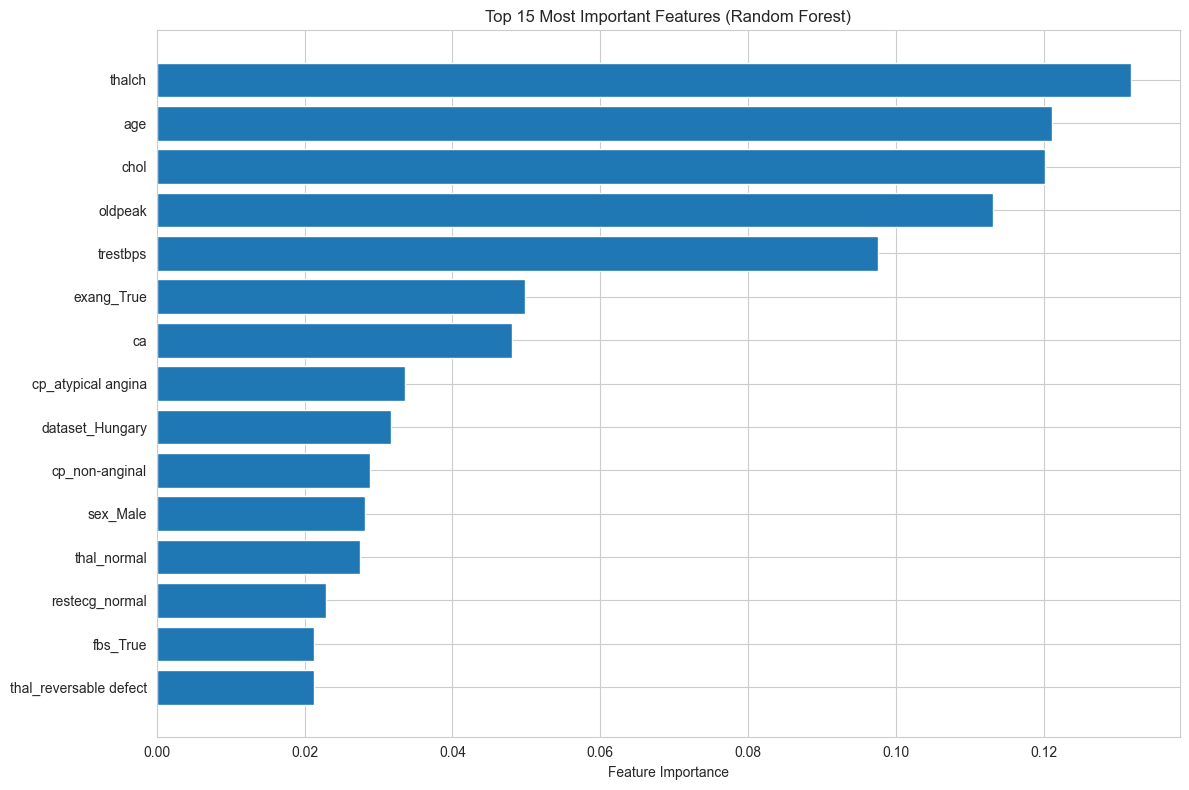

In [44]:
# Feature importance for Random Forest
print("="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Step 13: Save Preprocessing Objects

In [45]:
# Save preprocessing objects for future use
import joblib

# Create a dictionary of preprocessing objects
preprocessing_objects = {
    'numerical_imputer': numerical_imputer,
    'categorical_imputer': categorical_imputer,
    'onehot_encoder': onehot_encoder,
    'scaler': scaler,
    'feature_names': X_processed.columns.tolist()
}

# Save preprocessing objects
joblib.dump(preprocessing_objects, 'preprocessing_objects.pkl')
joblib.dump(rf_model, 'best_model.pkl')

print("Preprocessing objects and best model saved successfully!")

Preprocessing objects and best model saved successfully!
